In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2025-11-03 15:00:10.736946: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-03 15:00:11.346677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Define Paths
data_path = '../data/ISIC_2019_Training_Input'
csv_path = '../data/ISIC_2019_Training_GroundTruth.csv'

In [3]:
# Load metadata
df = pd.read_csv(csv_path)

In [4]:
# Add image paths to DataFrame for easy access
df['image_path'] = df['image'].apply(lambda x: os.path.join(data_path, x + '.jpg'))

In [5]:
# Convert one-hot encoded labels to categorical
class_columns = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
df['label'] = df[class_columns].idxmax(axis=1)

In [6]:
#  Split data into train (70%), validation (15%) and test (15%) sets
train_df, temp_df = train_test_split(df, test_size = 0.3, stratify = df['label'], random_state = 42)
val_df, test_df = train_test_split(temp_df, test_size = 0.5, stratify = temp_df['label'], random_state = 42)
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 17731, Validation: 3800, Test: 3800


In [8]:
target_size = (224, 224) # Resize images for EfficientNetB0
batch_size = 16 

val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'image_path',
    y_col = 'label',
    target_size = target_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False # Keep test data order to evaluation   
)

Found 3800 validated image filenames belonging to 8 classes.


In [9]:
model = load_model('best_finetuned_resnet50.keras')

2025-11-03 15:00:55.072082: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-03 15:00:55.099549: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-03 15:00:55.102338: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [10]:
# Prediction on test
test_generator.reset()
y_pred = model.predict(test_generator, verbose = 1)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = test_generator.classes

/home/elnaz/anaconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1762169463.690877   15207 service.cc:145] XLA service 0x7b83b0045d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762169463.690899   15207 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-11-03 15:01:03.772549: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-03 15:01:04.200439: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902
202

  2/238 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step   

I0000 00:00:1762169480.126095   15207 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step 

2025-11-03 15:02:09.571337: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 0.142456, expected -nan
2025-11-03 15:02:09.571381: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 1: 0.202148, expected 0
2025-11-03 15:02:09.571388: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 2: 0.123108, expected -nan
2025-11-03 15:02:09.571391: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 3: 0.14856, expected 0
2025-11-03 15:02:09.571395: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 4: 0.164917, expected -nan
2025-11-03 15:02:09.571398: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 5: 0.128174, expected 0
2025-11-03 15:02:09.571401: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 6: 0.130737, expected -nan
2025-11-03 15:02:09.571405: E external/local_xla/xla/service/gpu/buffer_comparator.cc:

238/238 ━━━━━━━━━━━━━━━━━━━━ 76s 244ms/step


In [11]:
# Classification report(precision, recall, F1)
report = classification_report(y_true, y_pred_classes, target_names = list(test_generator.class_indices.keys()))
print('class report:\n', report)

class report:
               precision    recall  f1-score   support

          AK       0.43      0.62      0.51       130
         BCC       0.74      0.60      0.66       499
         BKL       0.39      0.65      0.49       393
          DF       0.32      0.67      0.43        36
         MEL       0.55      0.63      0.58       679
          NV       0.92      0.72      0.80      1931
         SCC       0.36      0.57      0.45        94
        VASC       0.64      0.71      0.68        38

    accuracy                           0.67      3800
   macro avg       0.54      0.65      0.57      3800
weighted avg       0.73      0.67      0.69      3800



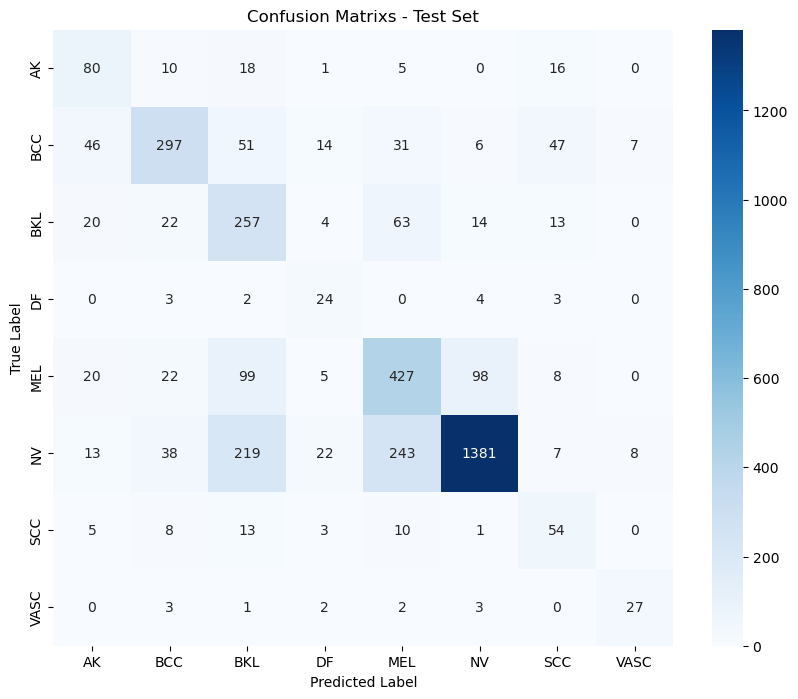

In [12]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
           xticklabels = list(test_generator.class_indices.keys()),
           yticklabels = list(test_generator.class_indices.keys()) 
           )
plt.title('Confusion Matrixs - Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [13]:
cm = confusion_matrix(y_true, y_pred_classes)

In [14]:
cm

array([[  80,   10,   18,    1,    5,    0,   16,    0],
       [  46,  297,   51,   14,   31,    6,   47,    7],
       [  20,   22,  257,    4,   63,   14,   13,    0],
       [   0,    3,    2,   24,    0,    4,    3,    0],
       [  20,   22,   99,    5,  427,   98,    8,    0],
       [  13,   38,  219,   22,  243, 1381,    7,    8],
       [   5,    8,   13,    3,   10,    1,   54,    0],
       [   0,    3,    1,    2,    2,    3,    0,   27]])